## IMPORTING LIBRARY


In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import os
import random
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,Flatten,Conv2D
from tensorflow.keras.layers import BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG,Image
import tensorflow as tf
print("Tensorflow version:")


Tensorflow version:


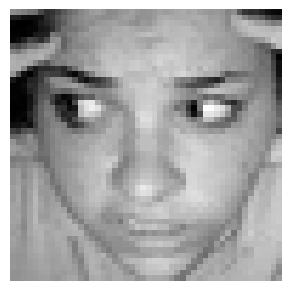

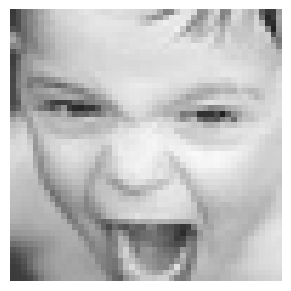

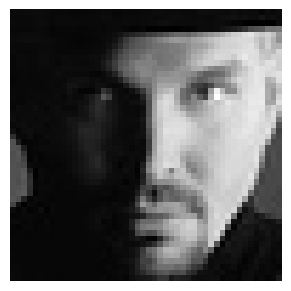

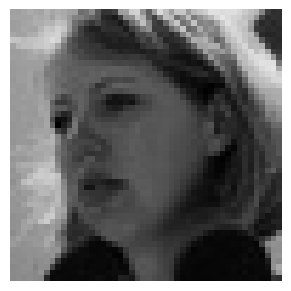

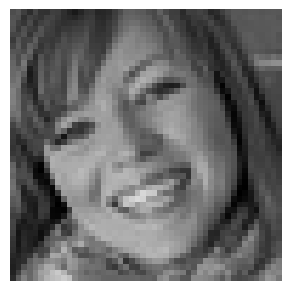

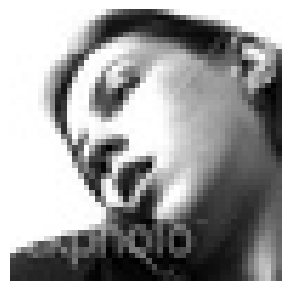

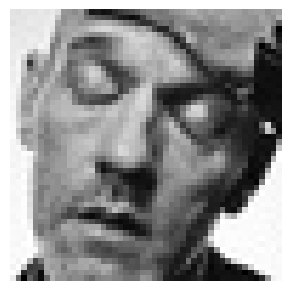

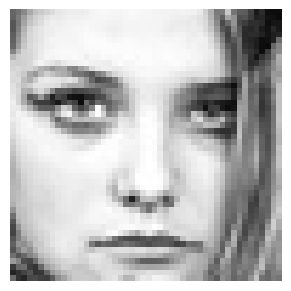

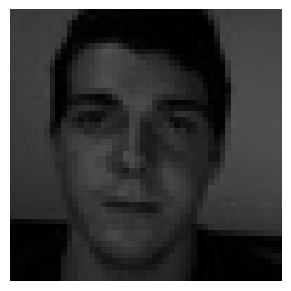

In [2]:
images = glob("train/**/**")
for i in range(9):
    image = random.choice(images)
    plt.figure(figsize=(12,12))
    plt.subplot(331+i)
    plt.imshow(cv2.imread(image));plt.axis('off')



In [9]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("train/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("test/",
                                                    target_size = (img_size,img_size),
                                                    color_mode = "grayscale",
                                                    batch_size = batch_size,
                                                    class_mode = "categorical",
                                                    shuffle = True)
                                                    

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
def Convolution(input_tensor,filters,kernel_size):
    x = Conv2D(filters = filters,kernel_size = kernel_size,padding = 'same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x  

In [11]:
def Dense_f(input_tensor,nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x    

In [12]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(inputs,64,(5,5))
    conv_3 = Convolution(inputs,128,(3,3))
    
    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)
    
    output = Dense(7,activation = "softmax")(dense_1)
    model = Model(inputs = [inputs],outputs = [output])
    model.compile(loss = ['categorical_crossentropy'],optimizer = 'adam',metrics = ['accuracy'])
    
    return model

In [13]:
model = model_fer((48,48,1))
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 1)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 48, 48, 128)       1280      
                                                                 
 batch_normalization_6 (Bat  (None, 48, 48, 128)       512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 48, 48, 128)       0         
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 24, 24, 128)       0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 128)       0   

In [14]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model_weights.h5",monitor = 'val_accuracy',save_weights_only = True, mode = 'max',verbose =1)
callbacks = [checkpoint]

In [15]:
history = model.fit(
    x = train_generator,
    steps_per_epoch = steps_per_epoch,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = validation_steps,
    callbacks = callbacks)

Epoch 1/15


448/448 [==============================] - ETA: 0s - loss: 1.6483 - accuracy: 0.3773
Epoch 1: saving model to model_weights.h5
448/448 [==============================] - 626s 1s/step - loss: 1.6483 - accuracy: 0.3773 - val_loss: 1.6983 - val_accuracy: 0.3637
Epoch 2/15
448/448 [==============================] - ETA: 0s - loss: 1.3489 - accuracy: 0.4883
Epoch 2: saving model to model_weights.h5
448/448 [==============================] - 382s 854ms/step - loss: 1.3489 - accuracy: 0.4883 - val_loss: 1.6927 - val_accuracy: 0.3265
Epoch 3/15
448/448 [==============================] - ETA: 0s - loss: 1.1898 - accuracy: 0.5536
Epoch 3: saving model to model_weights.h5
448/448 [==============================] - 194s 434ms/step - loss: 1.1898 - accuracy: 0.5536 - val_loss: 1.4108 - val_accuracy: 0.4675
Epoch 4/15
448/448 [==============================] - ETA: 0s - loss: 1.0618 - accuracy: 0.6073
Epoch 4: saving model to model_weights.h5
448/448 [==============================] - 1

In [17]:
model.evaluate(validation_generator)

113/113 [==============================] - 6s 53ms/step - loss: 1.9502 - accuracy: 0.4975


[1.9502053260803223, 0.49749234318733215]

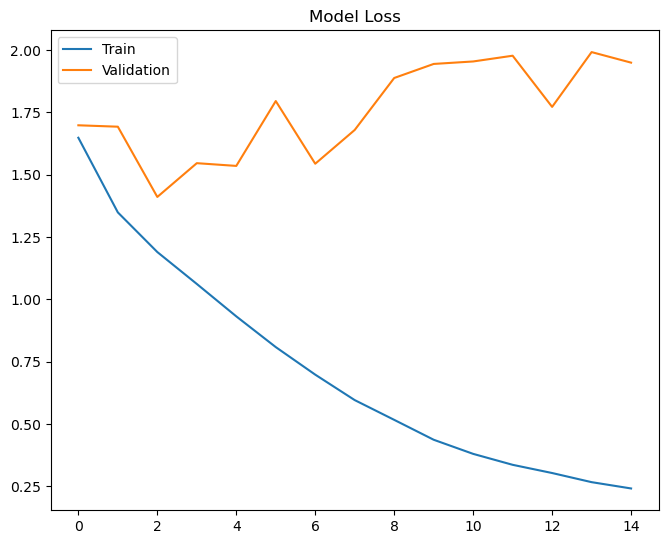

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top = 1.0,bottom = 0.0,left = 0.0,right = 0.95,hspace = 0.25,wspace = 0.35)

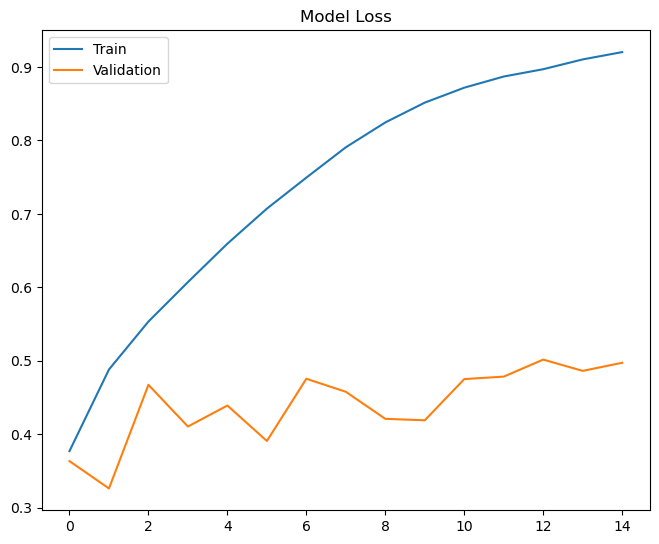

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top = 1.0,bottom = 0.0,left = 0.0,right = 0.95,hspace = 0.25,wspace = 0.35)

In [20]:
model_json = model.to_json()
with open('model_a.json',"w") as json_file:
    json_file.write(model_json)